In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import math

In [2]:
iris = datasets.load_iris()  #loading the dataset
X = iris.data[:, :]  
Y = iris.target

In [3]:
cov_mat = np.cov(X.T) #find the covariance matrix of X transpose

In [4]:
inv_cov = np.linalg.inv(cov_mat) #inverse of covariance matrix

In [5]:
x = []
for i in range(X.shape[1]):
    x.append(np.mean(X[:,i])) #mean of every attribute of data

In [6]:
print(x)

[5.843333333333334, 3.0573333333333337, 3.7580000000000005, 1.1993333333333336]


In [7]:
X_diff = X - x  

In [8]:
X_diffT = X_diff.T

In [9]:
print(X_diff.shape)
print(X_diffT.shape)
print(inv_cov.shape)

(150, 4)
(4, 150)
(4, 4)


In [10]:
y = []
#calculating the dot product for every row value 
for i in range(X.shape[0]):
    temp = np.dot(X_diff[i],inv_cov) 
    #temp =temp.reshape((4,1))
    temp = np.dot(X_diffT[:,i],temp)
    y.append(float(temp))
    #now y contains mahalanobis distance of each point

In [11]:
print(y)

[2.134467923324845, 2.8491186861586018, 2.0813386639577947, 2.4523816316796654, 2.462154534714047, 3.8834176695536957, 2.862108129509828, 1.8333003171272542, 3.384073114637464, 2.375217885591775, 3.2831068746355347, 2.774797507183937, 2.613297517026055, 3.6034323522488894, 8.737518362226805, 9.712789894390596, 5.760587677835366, 2.3213894420764123, 4.499689930524144, 3.438865828920075, 2.636007139608246, 2.929249570826122, 3.6134114173157554, 2.2371730748138345, 5.302360740705968, 2.4453102699152103, 1.765828623044174, 2.1971806422713382, 2.5027712011712095, 2.464398009842138, 1.9849637713370498, 4.591137998724253, 8.358341344195093, 7.221313941488222, 1.9820679232073193, 3.417303076747303, 5.337217456736288, 3.451334962536615, 3.1549793015227148, 1.8926196519430913, 2.548501278449005, 11.424028782006177, 3.3144696725150737, 3.708585540404914, 4.484056017711694, 2.9786602074332897, 4.433307695284248, 2.3594308861948, 3.0076969688464046, 1.9285641329024008, 4.452831070653284, 0.62739963

In [12]:
outliers = []
std = np.std(y)
k = 3. * std  #any object outside 3 units of standard deviation of y will be considered as an outlier
m = np.mean(y)
up_t = m + k #upper limit
low_t = m - k  #lower limit
outliers = []
for i in range(len(y)):
    if (y[i] >= up_t) or (y[i] <= low_t):
        outliers.append(i)  # index of the outlier
    
    

In [13]:
print(outliers)

[117, 131, 134, 141]


In [14]:
print(X[117],Y[131])
print(X[1],Y[1])
print(X[80],Y[80])
print(X[120],Y[120])

[7.7 3.8 6.7 2.2] 2
[4.9 3.  1.4 0.2] 0
[5.5 2.4 3.8 1.1] 1
[6.9 3.2 5.7 2.3] 2


# Visualization
#### dark points have smaller mahalanobis distance, as the point becomes lighter the mahalanobis distance increases

## pair wise plotting of attributes

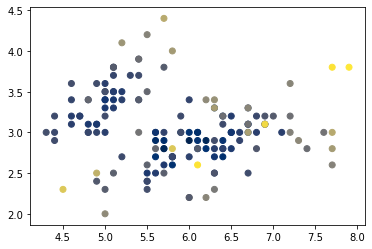

In [21]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='cividis')
plt.show()

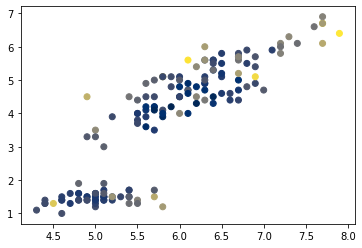

In [16]:
plt.scatter(X[:,0],X[:,2],c=y,cmap='cividis')
plt.show()

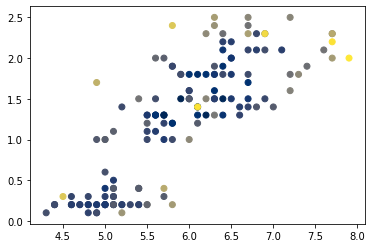

In [17]:
plt.scatter(X[:,0],X[:,3],c=y,cmap='cividis')
plt.show()

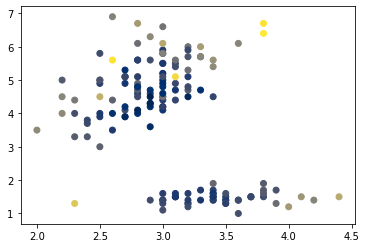

In [18]:
plt.scatter(X[:,1],X[:,2],c=y,cmap='cividis')
plt.show()

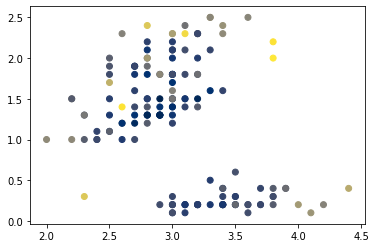

In [19]:
plt.scatter(X[:,1],X[:,3],c=y,cmap='cividis')
plt.show()

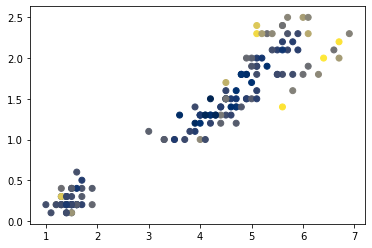

In [20]:
plt.scatter(X[:,2],X[:,3],c=y,cmap='cividis')
plt.show()